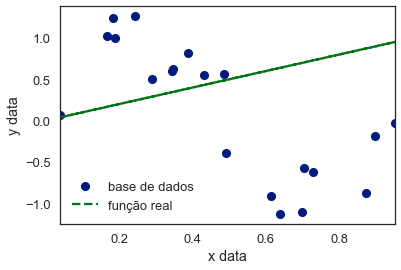

In [17]:
import pandas
import numpy
XYData = pandas.read_csv('XY_Sinusoid_Data.csv')
XGerado = numpy.linspace(start = 0 , stop = 1 , num = 100)
YGerado = XGerado
for x in range(0,100):
    YGerado[x] = numpy.sin(numpy.pi*2*XGerado[x])
#print(XYData)
#print(YGerado)

import matplotlib.pyplot as MatPlot
import seaborn

% matplotlib inline


seaborn.set_style('white')
seaborn.set_context('talk')
seaborn.set_palette('dark')

# Plot of the noisy (sparse)
ax = XYData.set_index('x')['y'].plot(ls='', marker='o', label='base de dados')
ax.plot(XGerado, YGerado, ls='--', marker='', label='função real')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

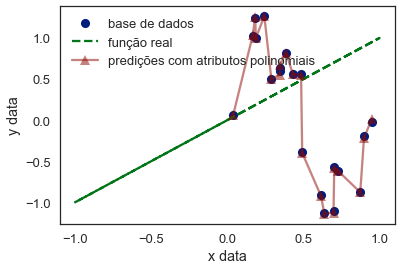

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extraindo x e y da base de dados no formato correto
X_data = XYData[['x']]
Y_data = XYData['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)

lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
MatPlot.plot(X_data, Y_data, marker='o', ls='', label='base de dados', alpha=1)
MatPlot.plot(XGerado, YGerado, ls='--', label='função real')
MatPlot.plot(X_data, Y_pred, marker='^', alpha=.5, label='predições com atributos polinomiais')
MatPlot.legend()
ax = MatPlot.gca()
ax.set(xlabel='x data', ylabel='y data');

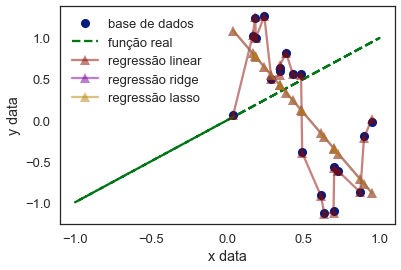

In [33]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# Crie o modelo Ridge
rr = Ridge(alpha = 0.001)
rr.fit(X_data, Y_data)
Y_pred_rr = rr.predict(X_data)

# Crie o modelo Lasso
lassor = Lasso(alpha = 0.0001)
lassor.fit(X_data,Y_data)
Y_pred_lr = lassor.predict(X_data)

# Vamos plotar as predições
MatPlot.plot(X_data, Y_data, marker='o', ls='', label='base de dados')
MatPlot.plot(XGerado, YGerado, ls='--', label='função real')
MatPlot.plot(X_data, Y_pred, label='regressão linear', marker='^', alpha=.5)
MatPlot.plot(X_data, Y_pred_rr, label='regressão ridge', marker='^', alpha=.5)
MatPlot.plot(X_data, Y_pred_lr, label='regressão lasso', marker='^', alpha=.5)

MatPlot.legend()

ax = MatPlot.gca()
ax.set(xlabel='x data', ylabel='y data');